# Install Libaries

In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install -U -q PyDrive
#!pip install pip install plotly==5.10.0

# Installing Plotly

In [ ]:
#!pip install --upgrade plotly
#!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 3.6 MB/s 
     |████████████████████████████████| 357 kB 47.8 MB/s 
     |████████████████████████████████| 1.6 MB 62.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=8523405f238bf38e7b9fbcb62980c1f4043f99a56dece4dc46729a28831ee7ea
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

Testing Plotly

In [ ]:
px.data.gapminder().head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [ ]:
 #For testing purpose using plotly data
 # load data from builtin Plotly data
 df = px.data.gapminder()
 # prepare a sunburst figure
 fig = px.sunburst(df, path=['continent', 'country', 'year'], values='pop',
                   color='lifeExp', hover_data=['iso_alpha'],
                   color_continuous_scale='twilight',
                   color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
 # build jupyter dash app
 app = JupyterDash(__name__)
 # add html components and figure to app
 app.layout = html.Div([dcc.Graph(figure=fig)])
 # run app inline
 app.run_server(mode='inline')

In [ ]:
#For testing only
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with the 'colab' Renderer"
)
fig.show(renderer="colab")

# Import Libaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Import CSV files from Google Drive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link_one = 'https://drive.google.com/file/d/1xNi4hEHazEi11U6x9keTlMq3GiPka_JY/view?usp=sharing'
link_two = 'https://drive.google.com/file/d/1P7Oh4--HwkiaOTQ11zMDUoZYnY0xGKj4/view?usp=sharing'

# to get the id part of the file
id1 = link_one.split("/")[-2]
id2 = link_two.split("/")[-2]

downloaded1 = drive.CreateFile({'id':id1})
downloaded2 = drive.CreateFile({'id':id2})

downloaded1.GetContentFile('apps.csv')
downloaded2.GetContentFile('user_reviews.csv')


# Google Play Store apps and reviews

In [ ]:
# Read in dataset
apps_with_duplicates = pd.read_csv("apps.csv")

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))


Total number of apps in the dataset =  9659


In [ ]:
# To look at a random sample of 5 rows
n = 5
apps.sample(n)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8499,9636,Classic Words Solo,GAME,4.4,135739,NaN,"5,000,000+",Free,0,Everyone,Word,"August 7, 2018",Varies with device,Varies with device
3702,4616,Please Don't Touch Anything 3D,FAMILY,4.2,146,20.0,"5,000+",Paid,$5.99,Teen,Puzzle,"December 7, 2016",1.1,4.4 and up
3245,4092,EX File Explorer File Manager,PRODUCTIVITY,4.0,4660,5.9,"1,000,000+",Free,0,Everyone,Productivity,"October 6, 2016",1,4.0 and up
8889,10048,Money Manager Ex for Android,FINANCE,4.2,2695,NaN,"100,000+",Free,0,Everyone,Finance,"February 26, 2018",Varies with device,Varies with device
6038,7081,iBiznes24 mobile,FINANCE,NaN,38,9.4,"5,000+",Free,0,Everyone,Finance,"June 30, 2018",1.8.1,4.4 and up


# Data Cleaning

In [ ]:
# List of characters to remove
chars_to_remove = ["+", ",", "$"]
# List of column names to clean
cols_to_clean = ["Installs", "Price"]

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ""))

# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


For the column Installs and Price, it's not the correct the data type.

# Correcting data types

In [ ]:
# Convert Installs to float data type
apps["Installs"] = apps["Installs"].astype("float")

# Convert Price to float data type
apps["Price"] = apps["Price"].astype("float")

# Checking dtypes of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB
None


# Exploring app categories

In [ ]:
import plotly
#plotly.offline.init_notebook_mode(connected=True)
#import plotly.graph_objects as go

# Print the total number of unique categories
num_categories = len(apps["Category"].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'.
num_apps_in_category = apps["Category"].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)
print(sorted_num_apps_in_category)



Number of categories =  33
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


In [ ]:
#Not work in collab
data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

In [ ]:
import plotly.express as px
fig = px.bar(x=num_apps_in_category.index, y=num_apps_in_category.values, color=num_apps_in_category.index)
fig.update_xaxes(title= 'Category')
fig.update_yaxes(title= 'Numbers of Category', autorange=True)
fig.show(renderer="colab")

# Distribution of app ratings

In [ ]:
# Average rating of apps
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)


Average app rating =  4.173243045387994


In [ ]:
# Distribution of apps according to their ratings
data = px.histogram(
        x = apps['Rating']).update_yaxes(title='Count of Apps')

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

#plotly.offline.iplot({'data': data, 'layout': layout})
data.update_layout(layout)
data.update_xaxes(title='Apps Rating')
#data.update_yaxes(title='Count of Apps')
data.show(renderer="colab")

# Size and price of an app

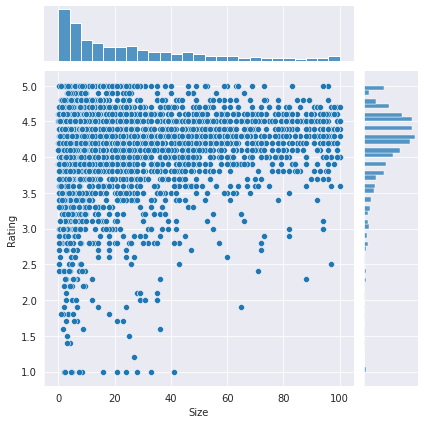

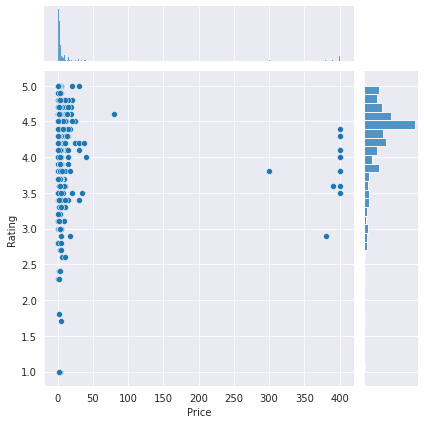

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[apps["Rating"].notnull()&apps["Size"].notnull()]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present["Type"] == "Paid" ]

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

# Relation between app category and app price

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


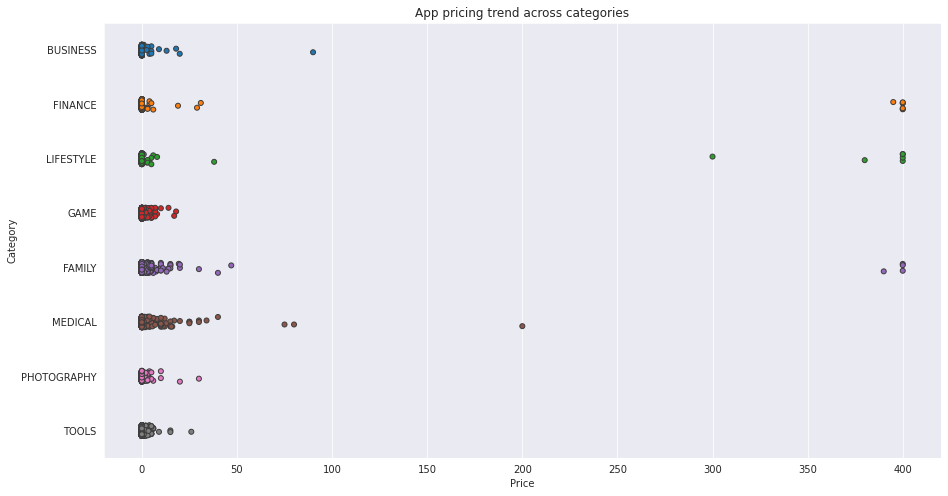

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps["Price"] > 200]
apps_above_200[['Category', 'App', 'Price']]

# Filter out "junk" apps

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

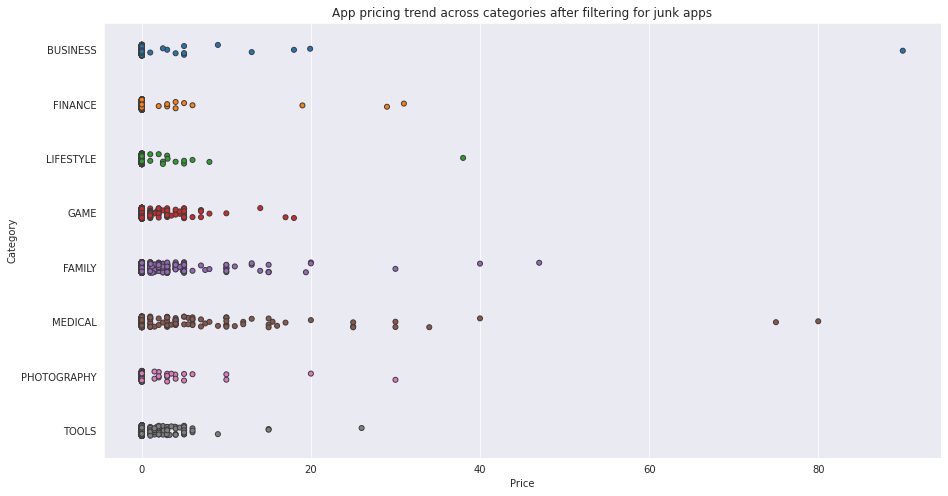

In [ ]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats["Price"] < 100 ]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = apps_under_100["Price"], y = apps_under_100["Category"], data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

# Popularity of paid apps vs free apps

In [ ]:
fig = px.box(x=apps['Type'], y=apps['Installs'],color=apps['Type'])

fig.update_layout(title='Number of downloads of paid apps vs. free apps')

fig.update_xaxes(title='Type of Apps',
                 categoryorder='array',
                 categoryarray=['Paid','Free'])

fig.update_yaxes(autorange=True,
                 type='log',
                 title='Log number of downloads')

fig.show(renderer='colab')

# Sentiment analysis of user reviews

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

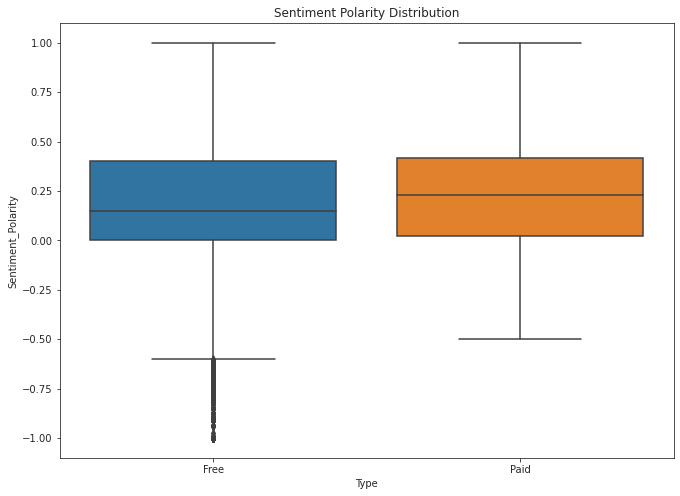

In [ ]:
# Load user_reviews.csv
reviews_df = pd.read_csv("user_reviews.csv")

# Join the two dataframes
merged_df = apps.merge(reviews_df)

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = merged_df["Type"], y = merged_df["Sentiment_Polarity"], data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

In [ ]:
#Alternative using plotly for interactive visual
fig = px.box(merged_df, x = "Type", y = "Sentiment_Polarity",
             color=merged_df["Type"],)
fig.show(renderer='colab')